# Breast Cancer Classification System

## Problem Overview

**Input Features (30):**

- Radius
- Texture
- Perimeter
- Area
- Smoothness
- ... _(Additional 25 diagnostic measurements)_

**Target Class (2):**

- **Malignant (0)**
- **Benign (1)**

**Objective:**  
Develop a binary classification system to predict tumor diagnosis (malignant or benign) based on 30 diagnostic features derived from digitized breast mass images.

---

## Dataset Description

**Key Statistics:**

- **Total Instances:** 569
- **Class Distribution:**
  - Malignant: 212 cases
  - Benign: 357 cases

**Data Sources:**

1. [Breast Cancer Wisconsin (Diagnostic) Dataset](<https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)>)
2. [Breast Cancer Detection with Reduced Feature Set](https://www.researchgate.net/publication/271907638_Breast_Cancer_Detection_with_Reduced_Feature_Set)

---

## Support Vector Machine (SVM) Classifier Approach

### Key Principles of SVM

1. **Maximum Margin Hyperplane:**  
   SVM identifies the optimal decision boundary that maximizes the margin between malignant and benign classes. Points closest to this boundary are called **support vectors**.

2. **Focus on Critical Instances:**  
   Unlike other algorithms that use all data points, SVM relies solely on support vectors to define the classification boundary. This makes it computationally efficient and robust to outliers.

3. **High-Dimensional Effectiveness:**  
   With 30 features, SVM excels at handling high-dimensional data by finding complex nonlinear relationships using kernel tricks.

### Why SVM for Breast Cancer Classification?

- **Binary Classification Strength:** Naturally suited for distinguishing between two classes (malignant vs. benign).
- **Margin Maximization:** Reduces overfitting by prioritizing the clearest separation between classes.
- **Feature-Rich Handling:** Performs well even with moderate feature-to-instance ratios.

**Critical Advantage:**  
SVM avoids ambiguous classifications near the decision boundary by focusing only on the most diagnostically significant cases (support vectors), mimicking how oncologists prioritize clear diagnostic indicators.


## **PROBLEM IN MACHINE LEARNING VOCABULARY**

_Input:_ 30 feautures

- Radius
- Texture
- Perimeter
- Area
- Smoothness
- ...

_Target Class:_ 2

- Malignant
- Benign

_How many datasets we have? :_

- Number of Instances : 569
- Class Distribution: 212 Malignant, 357 Benign

_Data source:_

- [Breast Cancer Wisconsin(Diagnostic)](<https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)>)
- [Breast Cancer Detection with Reduced Feature Set](https://www.researchgate.net/publication/271907638_Breast_Cancer_Detection_with_Reduced_Feature_Set)

We're going to say look if you look at these features then indicate that the cancer is let's say zero which is malignant in this case.

And then if we look at the 30 features may be classified as one which kind of a benign.

So it's kind of the opiate is binary in a forum indicating zero or one for malignant or benign.

---

**SUPPORT VECTOR MACHINE CLASSIFIER**

Near the max Margin Hyperplane, we don't know whether this cancer is malignant or benign.

That's why the support vector machine classifier is very unique in this sense. It's simply uses the points or the support vectors that are on the boundary to draw the boundary out to classify the classes.

Support vector machines are really powerful techniques.
Why? Because it's kind of an extreme algorithm.
It just focus on the support of the suppor vectors or the points on the boundary and seperate them somehow.


**1. IMPORTING DATA AND CLEANING DATA**


In [1]:
pip install reportlab

Note: you may need to restart the kernel to use updated packages.


In [6]:

import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization
import gradio as gr # For UI
import joblib #For creating and loading models into UI
import sqlite3
from datetime import datetime
import json
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from contextlib import contextmanager
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.platypus import Paragraph, SimpleDocTemplate, Spacer
import tempfile
import os
import io



**load_breast_cancer()**: Loads the Breast Cancer Wisconsin (Diagnostic) dataset from scikit-learn. This dataset contains features computed from digitized images of breast mass and is used for binary classification (malignant or benign).


In [3]:
# Import Cancer data drom the Sklearn library
cancer = load_breast_cancer()

In [4]:
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns=np.append(cancer['feature_names'], ['target']))

In [5]:
#Displays the dataset
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]], shape=(569, 30)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [6]:
# What dictionaries we have
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
# print them one by one
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [8]:
print(cancer['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [9]:
print(cancer['target_names'])

['malignant' 'benign']


In [10]:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [11]:
print(cancer['data'])

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [12]:
cancer['data'].shape

(569, 30)

Creating a DataFrame from the dataset using `pd.DataFrame()` that is a concatenation of data and target with columns of feature_names and target


In [13]:
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

In [14]:
#viewing the first five rows in the dataframe
df_cancer.head(5)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890     0.0  
1          0.2750                  0.08902     0.0  
2          0.3613                  0.08758     0.0  
3          0.6638                  0.17300     0.0  
4          0.2364                  0.07678     0.0  

[5 rows x 31 columns]

In [15]:
#last five rows
df_cancer.tail(5)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
564                0.2216          0.2060                  0.07115     0.0  
565                0.1628          0.2572                  0.06637     0.0  
566                0.1418          0.2218                  0.07820     0.0  
567                0.2650          0.4087                  0.12400     0.0  
568                0.0000          0.2871                  0.07039     1.0  

[5 rows x 31 columns]

**2. VISUALIZING THE DATA**


Visualizing the relationships between different features in the dataset. This is for understanding the data distribution and identifying patterns.


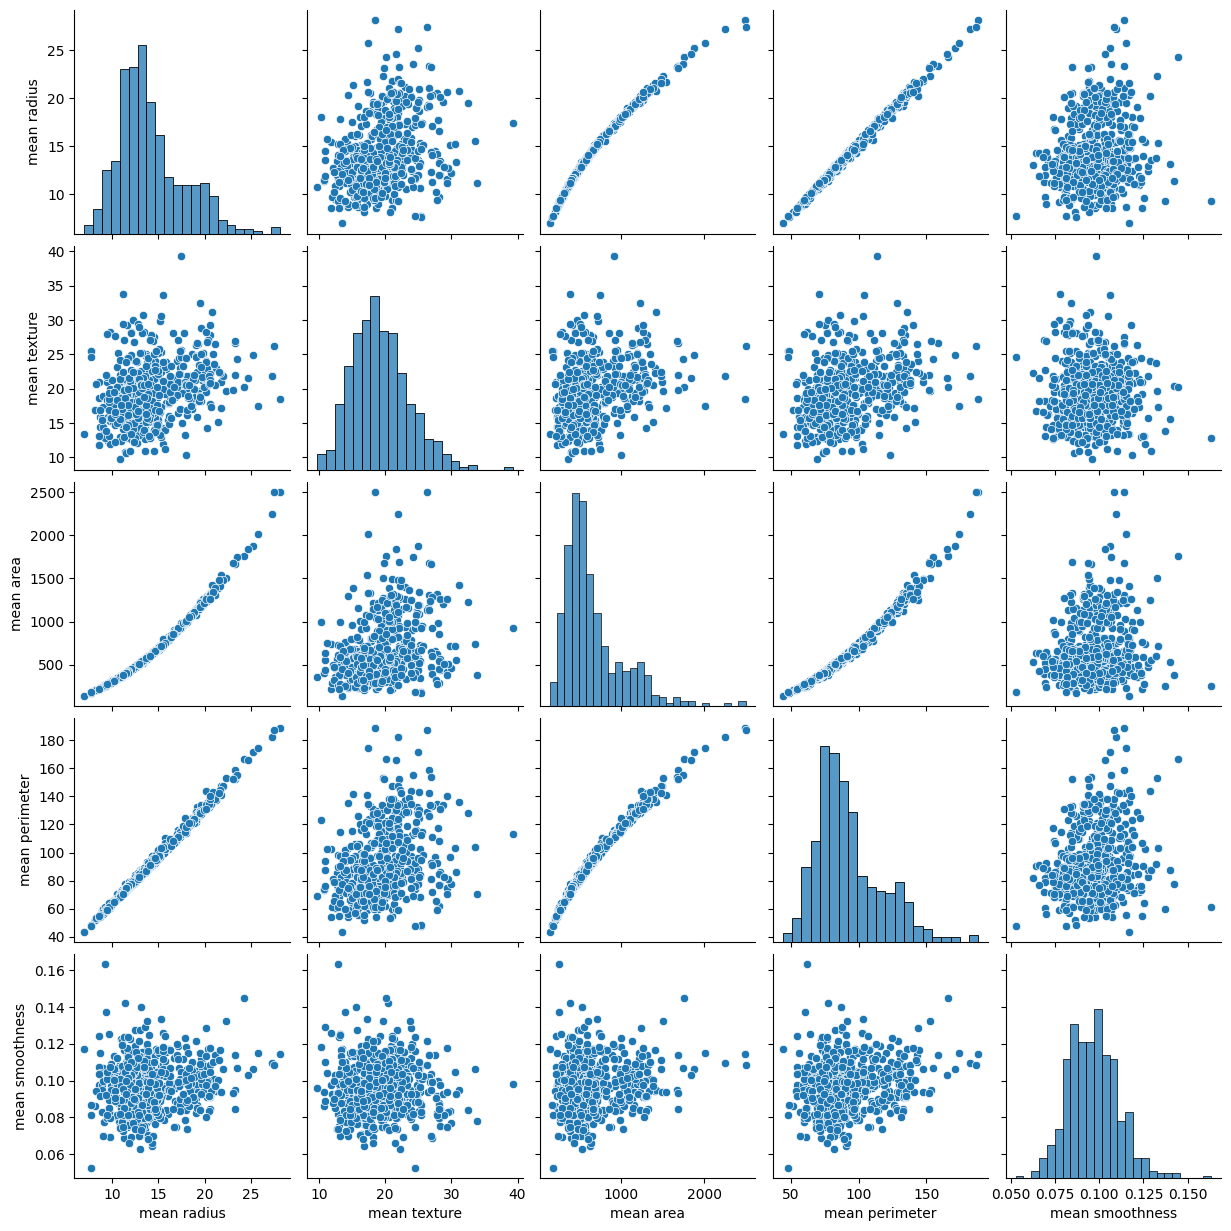

In [16]:
sns.pairplot(df_cancer, vars= ['mean radius','mean texture', 'mean area', 'mean perimeter', 'mean smoothness'])

But the only problem is that doesn't show the target class. It doesn't show actual which one of these samples is malignant or which one of them is benign.


In [17]:
sns.pairplot(df_cancer,hue = 'target', vars= ['mean radius','mean texture', 'mean area', 'mean perimeter', 'mean smoothness'])

The blue points in here that's the malignant case. The orange points in here that's the benign case.


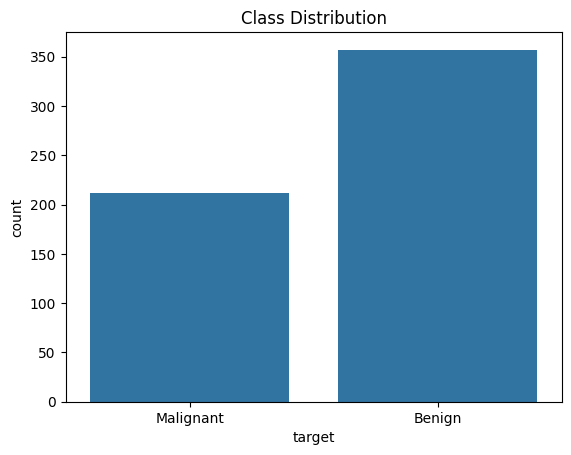

In [18]:
sns.countplot(x='target', data=df_cancer)
plt.title('Class Distribution')
plt.xticks(ticks=[0,1], labels=['Malignant', 'Benign'])
plt.show()

We take one of these slide graphs and see how can we play.


This helps one understand the relationship between two numerical features and how they relate to the target variable. By coloring points based on the target class (e.g., malignant or benign), it provides insights into whether the features can effectively separate the classes, aiding in feature selection and model building.


<Axes: xlabel='mean area', ylabel='mean smoothness'>

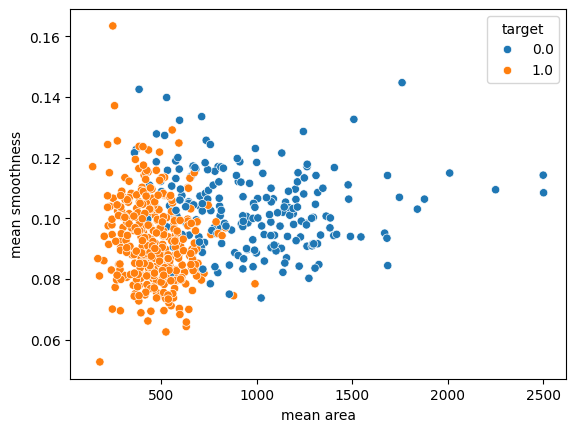

In [19]:
sns.scatterplot(x='mean area', y='mean smoothness', hue='target', data=df_cancer)

The correlation matrix of the dataset, makes it easy to identify strong positive or negative relationships between features. By including `annot=True`, the actual correlation values are displayed, helping to pinpoint which features are most relevant for analysis or modeling.


<Axes: >

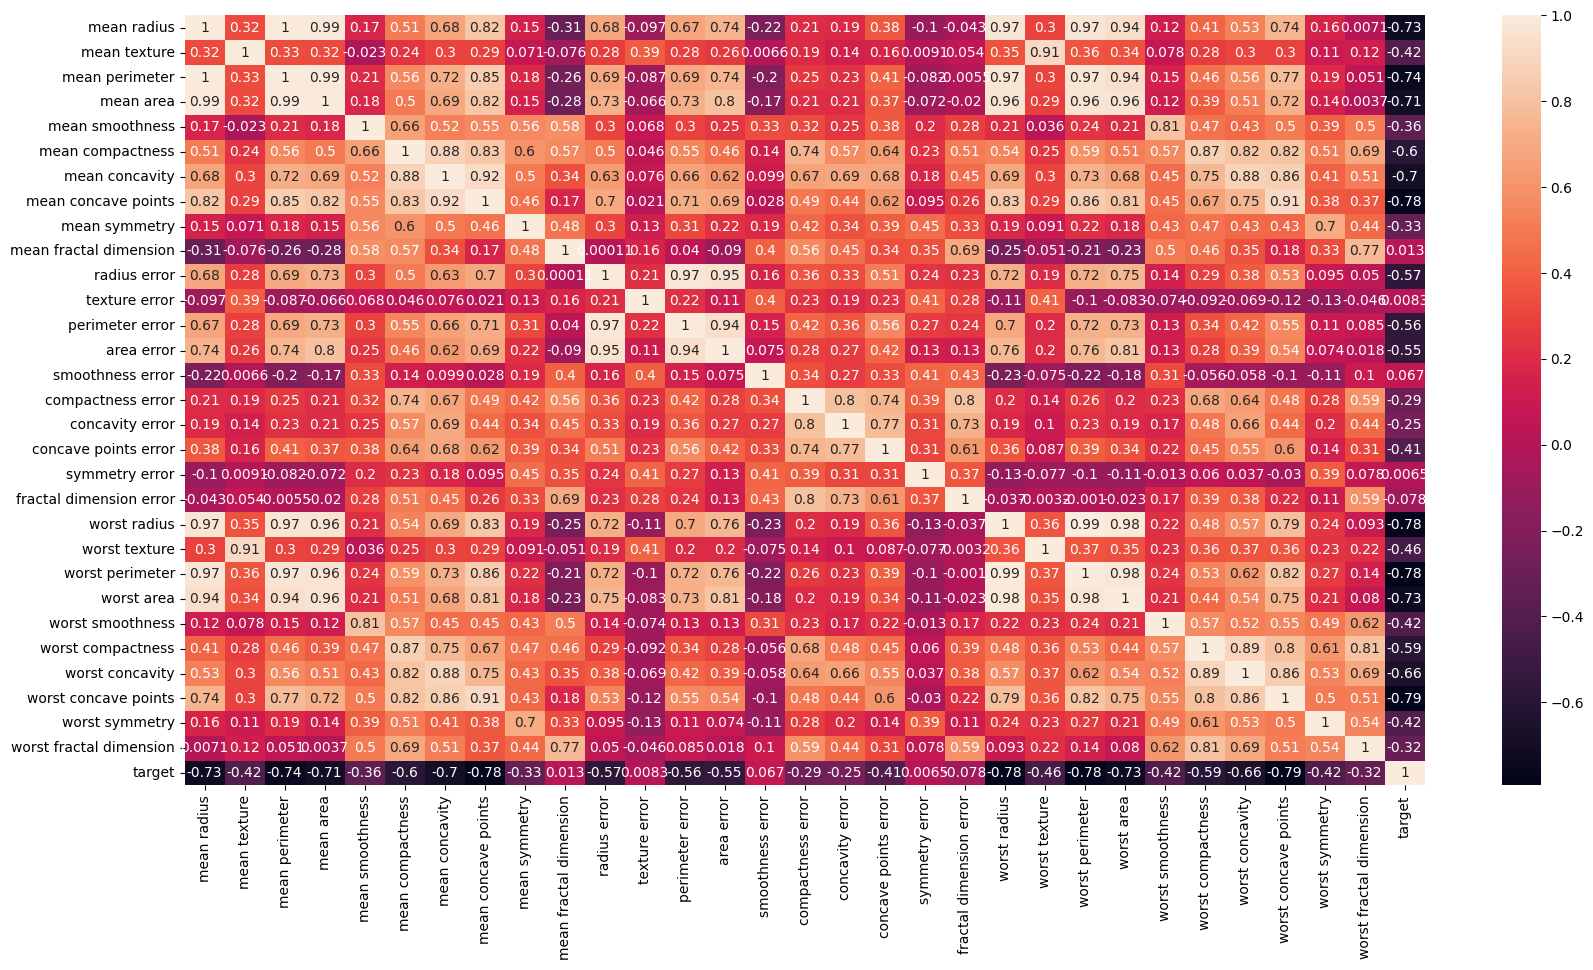

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(df_cancer.corr(), annot=True)

**3. MODEL TRAINING (FINDING A PROBLEM SOLUTION)**


Creating a new DataFrame x by dropping the target column from df_cancer, effectively isolating the feature variables for use in machine learning models. It ensures that only the input features (independent variables) are included, while the target variable (dependent variable) is excluded for training or analysis.


In [21]:
# Let's drop the target label coloumns
x = df_cancer.drop(['target'],axis=1)

In [22]:
x

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst radius  worst texture  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

Creating a new variable y that contains only the target column from df_cancer, representing the dependent variable (labels) for machine learning models. It isolates the target variable, which is essential for training and evaluating models, while keeping it separate from the input features.


In [23]:
y = df_cancer['target']
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

Importing `train_test_split` from `sklearn.model_selection` to split the dataset into training and testing sets. It divides x (features) and y (target) into `x_train, x_test, y_train, `and` y_test`, with 20% of the data reserved for testing (`test_size=0.20`) and a fixed random seed (`random_state=5`) for reproducibility. This ensures the model is trained on one subset and evaluated on another, preventing **overfitting**.


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state= 5)

The feature data (x) is used for training the machine learning model. It represents the input features for the training phase, allowing the model to learn patterns and relationships between the features and the target variable.


In [25]:
x_train

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
306       13.200         15.82           84.07      537.3          0.08511   
410       11.360         17.57           72.49      399.8          0.08858   
197       18.080         21.84          117.40     1024.0          0.07371   
376       10.570         20.22           70.15      338.3          0.09073   
244       19.400         23.50          129.10     1155.0          0.10270   
..           ...           ...             ...        ...              ...   
8         13.000         21.82           87.50      519.8          0.12730   
73        13.800         15.79           90.43      584.1          0.10070   
400       17.910         21.02          124.40      994.0          0.12300   
118       15.780         22.91          105.70      782.6          0.11550   
206        9.876         17.27           62.92      295.4          0.10890   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
306           0.05251        0.001461             0.003261         0.1632   
410           0.05313        0.027830             0.021000         0.1601   
197           0.08642        0.110300             0.057780         0.1770   
376           0.16600        0.228000             0.059410         0.2188   
244           0.15580        0.204900             0.088860         0.1978   
..                ...             ...                  ...            ...   
8             0.19320        0.185900             0.093530         0.2350   
73            0.12800        0.077890             0.050690         0.1662   
400           0.25760        0.318900             0.119800         0.2113   
118           0.17520        0.213300             0.094790         0.2096   
206           0.07232        0.017560             0.019520         0.1934   

     mean fractal dimension  ...  worst radius  worst texture  \
306                 0.05894  ...         14.41          20.45   
410                 0.05913  ...         13.05          36.32   
197                 0.05340  ...         19.76          24.70   
376                 0.08450  ...         10.85          22.82   
244                 0.06000  ...         21.65          30.53   
..                      ...  ...           ...            ...   
8                   0.07389  ...         15.49          30.73   
73                  0.06566  ...         16.57          20.86   
400                 0.07115  ...         20.80          27.78   
118                 0.07331  ...         20.19          30.50   
206                 0.06285  ...         10.42          23.22   

     worst perimeter  worst area  worst smoothness  worst compactness  \
306            92.00       636.9           0.11280             0.1346   
410            85.07       521.3           0.14530             0.1622   
197           129.10      1228.0           0.08822             0.1963   
376            76.51       351.9           0.11430             0.3619   
244           144.90      1417.0           0.14630             0.2968   
..               ...         ...               ...                ...   
8             106.20       739.3           0.17030             0.5401   
73            110.30       812.4           0.14110             0.3542   
400           149.60      1304.0           0.18730             0.5917   
118           130.30      1272.0           0.18550             0.4925   
206            67.08       331.6           0.14150             0.1247   

     worst concavity  worst concave points  worst symmetry  \
306          0.01120               0.02500          0.2651   
410          0.18110               0.08698          0.2973   
197          0.25350               0.09181          0.2369   
376          0.60300               0.14650          0.2597   
244          0.34580               0.15640          0.2920   
..               ...                   ...             ...   
8            0.53900               0.20600         

Dimension of x_train dataset that comprises of trainig set and number of features used for training the model


In [26]:
x_train.shape

(455, 30)

x_test contains the subset of the feature data (x) that is reserved for testing the machine learning model. It represents the input features for evaluating the model's performance on unseen data, ensuring the model generalizes well to new examples.


In [27]:
x_test

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
28         15.30         25.27          102.40      732.4          0.10820   
163        12.34         22.22           79.85      464.5          0.10120   
123        14.50         10.89           94.28      640.7          0.11010   
361        13.30         21.57           85.24      546.1          0.08582   
549        10.82         24.21           68.89      361.6          0.08192   
..           ...           ...             ...        ...              ...   
414        15.13         29.81           96.71      719.5          0.08320   
515        11.34         18.61           72.76      391.2          0.10490   
186        18.31         18.58          118.60     1041.0          0.08588   
3          11.42         20.38           77.58      386.1          0.14250   
261        17.35         23.06          111.00      933.1          0.08662   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
28            0.16970         0.16830              0.08751         0.1926   
163           0.10150         0.05370              0.02822         0.1551   
123           0.10990         0.08842              0.05778         0.1856   
361           0.06373         0.03344              0.02424         0.1815   
549           0.06602         0.01548              0.00816         0.1976   
..                ...             ...                  ...            ...   
414           0.04605         0.04686              0.02739         0.1852   
515           0.08499         0.04302              0.02594         0.1927   
186           0.08468         0.08169              0.05814         0.1621   
3             0.28390         0.24140              0.10520         0.2597   
261           0.06290         0.02891              0.02837         0.1564   

     mean fractal dimension  ...  worst radius  worst texture  \
28                  0.06540  ...         20.27          36.71   
163                 0.06761  ...         13.58          28.68   
123                 0.06402  ...         15.70          15.98   
361                 0.05696  ...         14.20          29.20   
549                 0.06328  ...         13.03          31.45   
..                      ...  ...           ...            ...   
414                 0.05294  ...         17.26          36.91   
515                 0.06211  ...         12.47          23.03   
186                 0.05425  ...         21.31          26.36   
3                   0.09744  ...         14.91          26.50   
261                 0.05307  ...         19.85          31.47   

     worst perimeter  worst area  worst smoothness  worst compactness  \
28            149.30      1269.0            0.1641            0.61100   
163            87.36       553.0            0.1452            0.23380   
123           102.80       745.5            0.1313            0.17880   
361            92.94       621.2            0.1140            0.16670   
549            83.90       505.6            0.1204            0.16330   
..               ...         ...               ...                ...   
414           110.10       931.4            0.1148            0.09866   
515            79.15       478.6            0.1483            0.15740   
186           139.20      1410.0            0.1234            0.24450   
3              98.87       567.7            0.2098            0.86630   
261           128.20      1218.0            0.1240            0.14860   

     worst concavity  worst concave points  worst symmetry  \
28           0.63350               0.20240          0.4027   
163          0.16880               0.08194          0.2268   
123          0.25600               0.12210          0.2889   
361          0.12120               0.05614          0.2637   
549          0.06194               0.03264          0.3059   
..               ...                   ...             ...   
414          0.15470               0.06575         

A dimensional number representing training set against number of features


In [28]:
x_test.shape

(114, 30)

`y_train` represents the labels or outcomes for the training set, which the model uses to learn the relationship between the input features and the target variable.


In [29]:
y_train

306    1.0
410    1.0
197    0.0
376    1.0
244    0.0
      ... 
8      0.0
73     0.0
400    0.0
118    0.0
206    1.0
Name: target, Length: 455, dtype: float64

Training set


In [30]:
y_train.shape

(455,)

Testing set


In [31]:
y_test

28     0.0
163    1.0
123    1.0
361    1.0
549    1.0
      ... 
414    0.0
515    1.0
186    0.0
3      0.0
261    0.0
Name: target, Length: 114, dtype: float64

In [32]:
y_test.shape

(114,)

The `SVC` (Support Vector Classifier) from `sklearn.svm` and the `classification_report` and `confusion_matrix` from `sklearn.metrics` to create an SVM model (`svc_model`), train it on the training data (`x_train` and `y_train`), and prepare it for making predictions and evaluating performance.


In [33]:

from sklearn.metrics import classification_report, confusion_matrix

In [34]:
svc_model = SVC()

In [35]:
svc_model.fit(x_train, y_train)

SVC()

**4. EVALUATING THE MODEL**


The trained Support Vector Classifier (svc_model) makes predictions on the test data (x_test). The predicted labels are stored in y_predict, which can then be compared with the actual labels (y_test) to evaluate the model's performance using metrics like accuracy, precision, recall, or the confusion matrix.


In [36]:
y_predict = svc_model.predict(x_test)

In [37]:
y_predict

array([0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.])

We're going to plot a confusion matrix. We need to specify compare our true value versus the predicted that.


The `confusion_matrix(y_test, y_predict)` computes the confusion matrix, showing the model's performance in terms of true positives, true negatives, false positives, and false negatives. The `sns.heatmap(cm, annot=True)` visualizes this matrix as a heatmap with annotated values, making it easy to interpret the model's accuracy and errors.


In [38]:
cm = confusion_matrix(y_test, y_predict)

<Axes: >

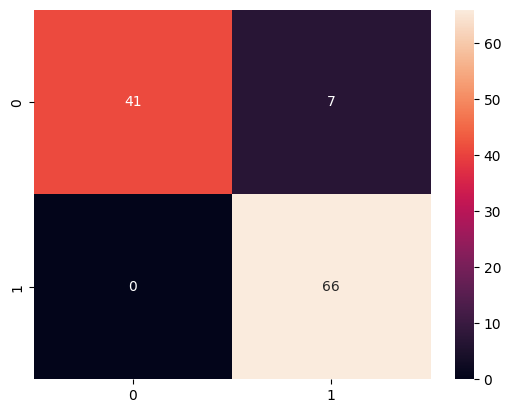

In [39]:
sns.heatmap(cm, annot=True)

Generating a detailed summary of the model's performance, including metrics like precision, recall, F1-score, and support for each class. Printing this report provides a clear and concise evaluation of how well the model is performing in terms of classification accuracy and error rates.


In [40]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92        48
         1.0       0.90      1.00      0.95        66

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



**5. IMPROVING THE MODEL**


A Series or array containing the smallest value observed for each feature, which can be useful for understanding the data distribution or preprocessing steps like normalization.


In [41]:
min_train = x_train.min()
min_train

mean radius                  6.981000
mean texture                 9.710000
mean perimeter              43.790000
mean area                  143.500000
mean smoothness              0.052630
mean compactness             0.019380
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.106000
mean fractal dimension       0.049960
radius error                 0.111500
texture error                0.362100
perimeter error              0.757000
area error                   6.802000
smoothness error             0.001713
compactness error            0.002252
concavity error              0.000000
concave points error         0.000000
symmetry error               0.007882
fractal dimension error      0.000950
worst radius                 7.930000
worst texture               12.020000
worst perimeter             50.410000
worst area                 185.200000
worst smoothness             0.071170
worst compactness            0.027290
worst concav

The range (maximum value after subtracting the minimum) for each feature in the training dataset (x_train), the result, stored in range_train, represents the spread of each feature's values, which is useful for scaling or normalizing the data.


In [42]:
range_train = (x_train - min_train).max()
range_train

mean radius                  21.129000
mean texture                 29.570000
mean perimeter              144.710000
mean area                  2355.500000
mean smoothness               0.110770
mean compactness              0.326020
mean concavity                0.426800
mean concave points           0.201200
mean symmetry                 0.198000
mean fractal dimension        0.045790
radius error                  2.761500
texture error                 4.522900
perimeter error              21.223000
area error                  518.798000
smoothness error              0.029417
compactness error             0.133148
concavity error               0.396000
concave points error          0.052790
symmetry error                0.071068
fractal dimension error       0.028890
worst radius                 25.190000
worst texture                37.520000
worst perimeter             170.390000
worst area                 3246.800000
worst smoothness              0.129430
worst compactness        

`x_train_scaled` contains the normalized feature values, ensuring all features contribute equally to the model and improving performance for algorithms sensitive to feature magnitudes.


In [43]:
x_train_scaled = (x_train - min_train)/range_train
x_train_scaled

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
306     0.294335      0.206628        0.278350   0.167183         0.293220   
410     0.207251      0.265810        0.198328   0.108809         0.324546   
197     0.525297      0.410213        0.508673   0.373806         0.190304   
376     0.169861      0.355428        0.182157   0.082700         0.343956   
244     0.587770      0.466351        0.589524   0.429421         0.452018   
..           ...           ...             ...        ...              ...   
8       0.284869      0.409537        0.302052   0.159754         0.674099   
73      0.322732      0.205614        0.322300   0.187052         0.433962   
400     0.517251      0.382482        0.557045   0.361070         0.635280   
118     0.416442      0.446398        0.427821   0.271322         0.567572   
206     0.137015      0.255665        0.132195   0.064487         0.507990   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
306          0.101620        0.003423             0.016208       0.288889   
410          0.103521        0.065206             0.104374       0.273232   
197          0.205632        0.258435             0.287177       0.358586   
376          0.449727        0.534208             0.295278       0.569697   
244          0.418441        0.480084             0.441650       0.463636   
..                ...             ...                  ...            ...   
8            0.533157        0.435567             0.464861       0.651515   
73           0.333170        0.182498             0.251938       0.304040   
400          0.730691        0.747188             0.595427       0.531818   
118          0.477946        0.499766             0.471123       0.523232   
206          0.162383        0.041143             0.097018       0.441414   

     mean fractal dimension  ...  worst radius  worst texture  \
306                0.196113  ...      0.257245       0.224680   
410                0.200262  ...      0.203255       0.647655   
197                0.075126  ...      0.469631       0.337953   
376                0.754313  ...      0.115919       0.287846   
244                0.219262  ...      0.544661       0.493337   
..                      ...  ...           ...            ...   
8                  0.522603  ...      0.300119       0.498667   
73                 0.342870  ...      0.342993       0.235608   
400                0.462765  ...      0.510917       0.420043   
118                0.509937  ...      0.486701       0.492537   
206                0.281503  ...      0.098849       0.298507   

     worst perimeter  worst area  worst smoothness  worst compactness  \
306         0.244087    0.139122          0.321641           0.104113   
410         0.203416    0.103517          0.572742           0.130890   
197         0.461823    0.321178          0.131731           0.163974   
376         0.153178    0.051343          0.333230           0.324640   
244         0.554551    0.379389          0.580468           0.261480   
..               ...         ...               ...                ...   
8           0.327425    0.170660          0.765897           0.497531   
73          0.351488    0.193175          0.540292           0.317170   
400         0.582135    0.344585          0.897242           0.547593   
118         0.468866    0.334730          0.883335           0.451349   
206         0.097834    0.045091          0.543383           0.094508   

     worst concavity  worst concave points  worst symmetry  \
306         0.010136              0.085911        0.258019   
410         0.163891              0.298900        0.334521   
197         0.229412              0.315498        0.191019   
376         0.545701              0.503436        0.245189   
244         0.312941              0.537457        0.321929   
..               ...                   ...             ...   
8           0.487783              0.707904        0

Distinguishing between malignant and benign tumors and identifying patterns or separability between the classes.


<Axes: xlabel='mean area', ylabel='mean smoothness'>

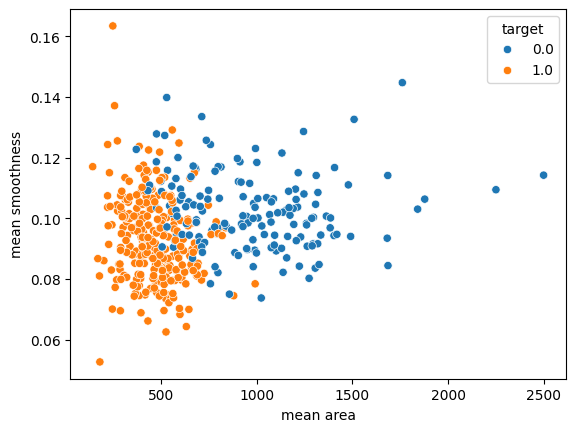

In [44]:
sns.scatterplot(x = x_train['mean area'], y= x_train['mean smoothness'], hue= y_train)

The points are colored based on the target variable (y_train), making it easy to see how well the scaled features separate the malignant and benign tumor classes.


<Axes: xlabel='mean area', ylabel='mean smoothness'>

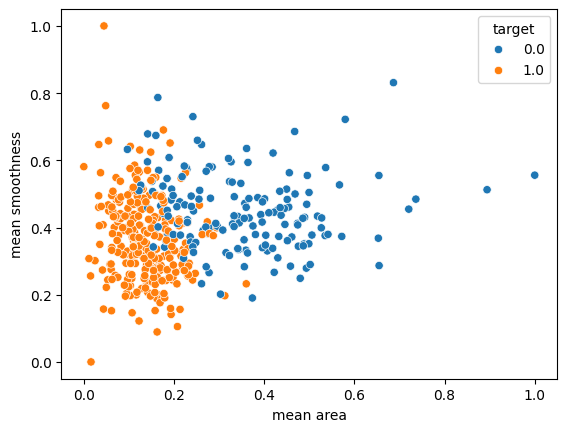

In [45]:
sns.scatterplot(x= x_train_scaled['mean area'], y= x_train_scaled['mean smoothness'], hue= y_train)

Performing **min-max scaling** on the test data (`x_test`) using the minimum and range values calculated from the test set, resulting in `x_test_scaled` with values normalized to [0, 1]. The scaled training data (`x_train_scaled`) and labels (`y_train`) are then used to train the Support Vector Classifier (`svc_model`), ensuring the model learns from normalized features.


In [46]:
min_test = x_test.min()
range_test = (x_test - min_test).max()
x_test_scaled = (x_test - min_test)/ range_test

In [47]:
svc_model.fit(x_train_scaled, y_train)

SVC()

In [48]:
y_predict = svc_model.predict(x_test_scaled)

In [49]:
cm = confusion_matrix(y_test, y_predict)

<Axes: >

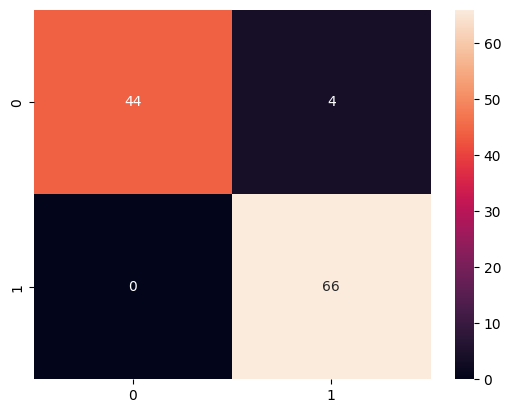

In [50]:
sns.heatmap(cm, annot=True, fmt = 'd')

A detailed summary of the model's performance, including metrics like precision, recall, F1-score, and support for each class. Printing this report provides a clear and concise evaluation of how well the model is performing in terms of classification accuracy and error rates.


In [51]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        48
         1.0       0.94      1.00      0.97        66

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



**2. IMPROVING THE MODEL - PART 2**


Finding the best hyperparameters (C, gamma, and kernel) for the Support Vector Classifier (SVC). It trains the model (grid.fit) on the scaled training data (x_train_scaled, y_train), evaluating all combinations of hyperparameters to optimize performance.


In [52]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
grid = GridSearchCV(SVC(), param_grid, refit= True, verbose= 4)

In [55]:
grid.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.945 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.912 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.956 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.934 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.945 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.901 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.890 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.923 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.868 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.648 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

`grid.best_params_` returns the best hyperparameters (e.g., `C`, `gamma`, `kernel`) found during the grid search, while `grid.best_estimator_` returns the best-trained model configured with these optimal hyperparameters. These attributes help us understand and use the most effective model for predictions or further analysis.


In [56]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [57]:
grid.best_estimator_

SVC(C=1, gamma=1)

The `grid.predict(x_test_scaled)` uses the best-trained model from the grid search to make predictions on the scaled test data (`x_test_scaled`). The `confusion_matrix(y_test, grid_prediction)` and `sns.heatmap(cm, annot=True)` visualize the model's performance by comparing actual (`y_test`) and predicted (`grid_prediction`) labels, highlighting correct and incorrect classifications.


In [58]:
grid_prediction = grid.predict(x_test_scaled)

In [59]:
cm = confusion_matrix(y_test, grid_prediction)

<Axes: >

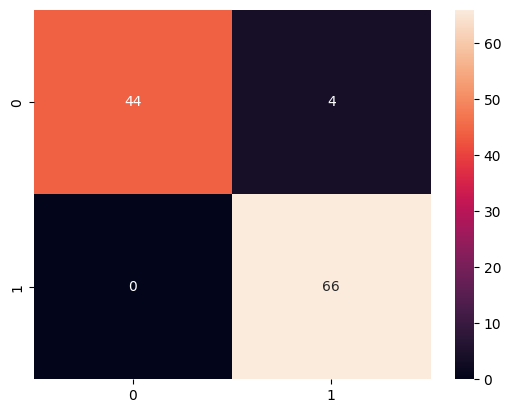

In [60]:
sns.heatmap(cm, annot=True)

Generating a detailed summary of the model's performance, including metrics like precision, recall, F1-score, and support for each class to provides a clear and concise evaluation of how well the optimized model is performing in terms of classification accuracy and error rates.


In [61]:
print(classification_report(y_test,grid_prediction ))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        48
         1.0       0.94      1.00      0.97        66

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [62]:

# Load data
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

# Scale data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

# Create and train model WITH probability=True
best_model = SVC(C=10, gamma=0.01, kernel='rbf', probability=True, random_state=5)
best_model.fit(X_train_scaled, y_train)

# Save model and scaler
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(best_model, 'breast_cancer_model.pkl')

print("Model and scaler saved successfully!")

Model and scaler saved successfully!


In [ ]:
import sqlite3
import numpy as np
import pandas as pd
import joblib
import json
import tempfile
from contextlib import contextmanager
from pathlib import Path
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from reportlab.lib import colors
from reportlab.lib.pagesizes import letter, landscape
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.units import inch
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Table, TableStyle
from reportlab.graphics.charts.piecharts import Pie
from reportlab.graphics.shapes import Drawing
import gradio as gr

# Configuration
DB_PATH = 'diagnoses.db'
cancer = load_breast_cancer()
AUTHENTICATION = [("admin", "admin123")]

# Database setup
@contextmanager
def get_db_connection():
    """Create a thread-safe database connection"""
    conn = sqlite3.connect(DB_PATH)
    conn.row_factory = sqlite3.Row
    try:
        yield conn
    finally:
        conn.close()

def initialize_database():
    """Create database tables with correct schema"""
    with get_db_connection() as conn:
        conn.execute("""
            CREATE TABLE IF NOT EXISTS diagnoses (
                patient_id INTEGER PRIMARY KEY AUTOINCREMENT,
                patient_name TEXT NOT NULL,
                contact_number TEXT NOT NULL,
                address TEXT NOT NULL,
                age INTEGER NOT NULL,
                features TEXT NOT NULL,
                diagnosis TEXT NOT NULL,
                confidence REAL NOT NULL,
                timestamp DATETIME DEFAULT CURRENT_TIMESTAMP
            )""")
        conn.commit()

# Model setup
def load_model():
    """Load or create ML model"""
    try:
        model = joblib.load('breast_cancer_model.pkl')
        scaler = joblib.load('scaler.pkl')
    except:
        X_train, X_test, y_train, y_test = train_test_split(
            cancer.data, cancer.target, test_size=0.2, random_state=42
        )
        scaler = StandardScaler().fit(X_train)
        model = SVC(probability=True).fit(scaler.transform(X_train), y_train)
        joblib.dump(model, 'breast_cancer_model.pkl')
        joblib.dump(scaler, 'scaler.pkl')
    return model, scaler

model, scaler = load_model()

# Core functions
# def predict(patient_name, contact_number, address, age, *features):
#     """Handle prediction and storage of diagnosis results"""
#     try:
#         input_data = np.array(features).reshape(1, -1)
#         if np.isnan(input_data).any():
#             return "Invalid/missing medical values detected", pd.DataFrame()

#         scaled_data = scaler.transform(input_data)
#         prediction = model.predict(scaled_data)[0]
#         probas = model.predict_proba(scaled_data)
#         confidence = probas[0].max()
#         diagnosis = "Malignant" if prediction == 0 else "Benign"

#         if store_diagnosis(patient_name, contact_number, address, age, 
#                          input_data[0], diagnosis, confidence):
#             return f"{diagnosis} ({confidence:.2%} confidence)", view_diagnoses()
#         return "Diagnosis failed - storage error", pd.DataFrame()
    
#     except Exception as e:
#         return f"System Error: {str(e)}", pd.DataFrame()

def predict(patient_name, contact_number, address, age, *features):
    try:
        # Convert to numpy array with explicit float type
        input_data = np.array(features, dtype=np.float64).reshape(1, -1)
        
        # Validate numerical input
        if not np.issubdtype(input_data.dtype, np.number):
            raise ValueError("Non-numeric values detected in features")
            
        if np.isnan(input_data).any():
            return "Invalid/missing medical values detected", pd.DataFrame()

        # Rest of the prediction logic remains the same...
        scaled_data = scaler.transform(input_data)
        prediction = model.predict(scaled_data)[0]
        probas = model.predict_proba(scaled_data)
        confidence = probas[0].max()
        diagnosis = "Malignant" if prediction == 0 else "Benign"

        if store_diagnosis(patient_name, contact_number, address, age, 
                         input_data[0], diagnosis, confidence):
            return f"{diagnosis} ({confidence:.2%} confidence)", view_diagnoses()
        
        return "Diagnosis failed - storage error", pd.DataFrame()
    
    except Exception as e:
        return f"System Error: {str(e)}", pd.DataFrame()

def store_diagnosis(patient_name, contact_number, address, age, features, diagnosis, confidence):
    """Store diagnosis with auto-generated PID"""
    try:
        features_dict = {name: float(value) for name, value in zip(cancer.feature_names, features)}
        
        with get_db_connection() as conn:
            cursor = conn.cursor()
            cursor.execute("""
                INSERT INTO diagnoses (
                    patient_name, contact_number, address, age,
                    features, diagnosis, confidence
                ) VALUES (?, ?, ?, ?, ?, ?, ?)
            """, (
                str(patient_name), 
                str(contact_number),
                str(address),
                int(age),
                json.dumps(features_dict), 
                str(diagnosis), 
                float(confidence)
            ))
            conn.commit()
            
            print(f"Stored diagnosis for PID{cursor.lastrowid:03d}")
            return True
            
    except Exception as e:
        print(f"Storage error details: {str(e)}")
        return False
    
store_diagnosis(
    "Test Patient", 
    "+123456789", 
    "Test Address", 
    35,
    [17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871,
     1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193,
     25.38, 17.33, 184.6, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189],
    "Benign",
    0.95
)

def view_diagnoses(limit=5):
    """Retrieve recent diagnoses with formatted PID"""
    try:
        with get_db_connection() as conn:
            cursor = conn.cursor()
            cursor.execute("""
                SELECT patient_id, patient_name, contact_number,
                       address, age, diagnosis, confidence, timestamp 
                FROM diagnoses 
                ORDER BY timestamp DESC 
                LIMIT ?""", (int(limit),))
            
            df = pd.DataFrame(cursor.fetchall(), columns=[
                'patient_id', 'patient_name', 'contact_number',
                'address', 'age', 'diagnosis', 'confidence', 'timestamp'
            ])
            
            if not df.empty:
                df['patient_id'] = df['patient_id'].apply(lambda x: f"PID{x:03d}")
                df['confidence'] = df['confidence'].map("{:.2%}".format)
                df['timestamp'] = pd.to_datetime(df['timestamp']).dt.strftime('%Y-%m-%d %H:%M')
            
            return df.rename(columns={
                'patient_id': 'PID', 'patient_name': 'Name',
                'contact_number': 'Contact', 'address': 'Address',
                'age': 'Age', 'diagnosis': 'Diagnosis',
                'confidence': 'Confidence', 'timestamp': 'Timestamp'
            })
    except Exception as e:
        print(f"Retrieval error: {e}")
        return pd.DataFrame()

# Report Generation
def generate_report(patient_id):
    """Generate PDF report for a specific patient"""
    try:
        raw_id = patient_id.replace("PID", "").lstrip("0")
        if not raw_id.isdigit():
            raise ValueError("Invalid PID format")
        
        with get_db_connection() as conn:
            cursor = conn.cursor()
            cursor.execute("SELECT * FROM diagnoses WHERE patient_id = ?", (int(raw_id),))
            record = cursor.fetchone()

        if not record:
            return None

        styles = getSampleStyleSheet()
        with tempfile.NamedTemporaryFile(suffix=".pdf", delete=False) as tmpfile:
            filename = tmpfile.name

        doc = SimpleDocTemplate(filename, pagesize=letter)
        story = [
            Paragraph("Medical Diagnosis Report", styles["Title"]),
            Spacer(1, 12),
            Paragraph(f"<b>Patient ID:</b> {patient_id}", styles["Normal"]),
            Paragraph(f"<b>Name:</b> {record['patient_name']}", styles["Normal"]),
            Paragraph(f"<b>Age:</b> {record['age']}", styles["Normal"]),
            Spacer(1, 24),
            Paragraph(f"<b>Diagnosis:</b> {record['diagnosis']}", styles["Normal"]),
            Paragraph(f"<b>Confidence:</b> {float(record['confidence']):.2%}", styles["Normal"]),
            Spacer(1, 24)
        ]

        # Features table
        features = json.loads(record['features'])
        feature_data = [[k, f"{v:.4f}"] for k, v in features.items()]
        feature_table = Table([["Measurement", "Value"]] + feature_data)
        feature_table.setStyle(TableStyle([
            ('BACKGROUND', (0,0), (-1,0), colors.lightgrey),
            ('ALIGN', (0,0), (-1,-1), 'CENTER'),
            ('GRID', (0,0), (-1,-1), 1, colors.black)
        ]))
        story.append(feature_table)

        doc.build(story)
        return filename
    except Exception as e:
        print(f"Report error: {str(e)}")
        return None

def generate_statistical_report():
    """Generate PDF report with system statistics"""
    try:
        with tempfile.NamedTemporaryFile(suffix=".pdf", delete=False) as tmpfile:
            filename = tmpfile.name

        doc = SimpleDocTemplate(filename, pagesize=letter)
        story = [Paragraph("System Statistics Report", getSampleStyleSheet()["Title"])]

        with get_db_connection() as conn:
            cursor = conn.cursor()
            cursor.execute("SELECT COUNT(*) FROM diagnoses")
            total = cursor.fetchone()[0]
            
            cursor.execute("SELECT diagnosis, COUNT(*) FROM diagnoses GROUP BY diagnosis")
            diag_data = cursor.fetchall()

        # Statistics table
        table_data = [["Metric", "Value"], ["Total Patients", total]]
        if diag_data:
            table_data += [[diag, count] for diag, count in diag_data]
        
        stats_table = Table(table_data)
        stats_table.setStyle(TableStyle([
            ('BACKGROUND', (0,0), (-1,0), colors.lightgrey),
            ('GRID', (0,0), (-1,-1), 1, colors.black)
        ]))
        story.extend([Spacer(1, 24), stats_table])

        doc.build(story)
        return filename
    except Exception as e:
        print(f"Stats report error: {str(e)}")
        return None

def generate_patient_list_report():
    """Generate PDF report of all patients"""
    try:
        with tempfile.NamedTemporaryFile(suffix=".pdf", delete=False) as tmpfile:
            filename = tmpfile.name

        doc = SimpleDocTemplate(filename, pagesize=landscape(letter))
        story = [Paragraph("Patient List Report", getSampleStyleSheet()["Title"])]

        with get_db_connection() as conn:
            cursor = conn.cursor()
            cursor.execute("SELECT * FROM diagnoses ORDER BY timestamp DESC")
            rows = cursor.fetchall()

        table_data = [["PID", "Name", "Contact", "Address", "Diagnosis", "Confidence"]]
        for row in rows:
            table_data.append([
                f"PID{row['patient_id']:03d}",
                row['patient_name'],
                row['contact_number'],
                row['address'],
                row['diagnosis'],
                f"{float(row['confidence']):.2%}"
            ])

        patient_table = Table(table_data, repeatRows=1)
        patient_table.setStyle(TableStyle([
            ('BACKGROUND', (0,0), (-1,0), colors.lightgrey),
            ('FONTSIZE', (0,0), (-1,-1), 8),
            ('GRID', (0,0), (-1,-1), 1, colors.black)
        ]))
        story.extend([Spacer(1, 24), patient_table])

        doc.build(story)
        return filename
    except Exception as e:
        print(f"Patient list error: {str(e)}")
        return None

# Gradio Interface
def create_history_interface():
    with gr.Blocks(title="Diagnosis History") as interface:
        gr.Markdown("# Historical Diagnosis Records")
        
        with gr.Row():
            search_input = gr.Textbox(
                label="Search by Patient ID or Name",
                placeholder="Enter PID (e.g., PID001) or name..."
            )
            limit_selector = gr.Dropdown(
                choices=[5, 10, 25, 50, 100], value=10, label="Max Records"
            )
            refresh_btn = gr.Button("ðŸ”ƒ Refresh", variant="secondary")
        
        records_table = gr.DataFrame(
            headers=["PID", "Name", "Contact", "Address", "Age", "Diagnosis", "Confidence", "Timestamp"],
            interactive=False
        )

        with gr.Row():
            report_type = gr.Dropdown(
                choices=["Individual Patient Report", "System Statistics Report", "All Patients List"],
                value="Individual Patient Report",
                label="Report Type"
            )
            report_pid = gr.Textbox(
                label="Patient ID for Report",
                visible=True,
                placeholder="PID000"
            )
            generate_btn = gr.Button("ðŸ“„ Generate Report", variant="primary")
        
        report_download = gr.File(label="Generated Report", visible=False)
        error_output = gr.Textbox(label="Error Message", visible=False)

        def toggle_pid_input(report_type):
            return gr.update(visible=report_type == "Individual Patient Report")

        def search_history(search_term, limit):
            try:
                with get_db_connection() as conn:
                    cursor = conn.cursor()
                    query = """
                        SELECT patient_id, patient_name, contact_number,
                               address, age, diagnosis, confidence, timestamp
                        FROM diagnoses 
                        WHERE (? = '' OR patient_name LIKE ? OR patient_id = ?)
                        ORDER BY timestamp DESC 
                        LIMIT ?
                    """
                    pid = search_term[3:] if search_term.startswith("PID") else ''
                    cursor.execute(query, (
                        search_term, f"%{search_term}%", pid, int(limit)
                    ))
                    df = pd.DataFrame(cursor.fetchall(), columns=[
                        'patient_id', 'patient_name', 'contact_number',
                        'address', 'age', 'diagnosis', 'confidence', 'timestamp'
                    ])
                    
                    if not df.empty:
                        df['patient_id'] = df['patient_id'].apply(lambda x: f"PID{x:03d}")
                        df['confidence'] = df['confidence'].apply(lambda x: f"{float(x):.2%}")
                        df['timestamp'] = pd.to_datetime(df['timestamp']).dt.strftime('%Y-%m-%d %H:%M')
                    
                    return df
            except Exception as e:
                print(f"Search error: {e}")
                return pd.DataFrame()

        def handle_report_generation(report_type, pid):
            try:
                filename = None
                if report_type == "Individual Patient Report":
                    if not pid.startswith("PID"):
                        raise ValueError("Invalid PID format")
                    filename = generate_report(pid)
                elif report_type == "All Patients List":
                    filename = generate_patient_list_report()
                else:
                    filename = generate_statistical_report()

                if filename and Path(filename).exists():
                    return filename, gr.update(visible=True), ""
                return None, gr.update(visible=False), "Failed to generate report"
            except Exception as e:
                return None, gr.update(visible=False), f"Error: {str(e)}"

        report_type.change(toggle_pid_input, report_type, report_pid)
        refresh_btn.click(search_history, [search_input, limit_selector], records_table)
        generate_btn.click(
            handle_report_generation,
            [report_type, report_pid],
            [report_download, report_download, error_output]
        )
        
        interface.load(lambda: search_history("", 10), outputs=records_table)
    
    return interface


def create_autofill_tab(predict_interface):
    with gr.Blocks() as autofill_tab:
        gr.Markdown("""
        ## Medical Features Auto-Fill
        **Instructions:**
        1. Paste your 30 comma-separated medical features below
        2. Click the autofill button
        3. Switch to 'New Diagnosis' tab
        4. Manually fill patient information (name, contact, address, age)
        """)
        
        with gr.Row():
            features_input = gr.Textbox(
                label="Paste ONLY medical features (30 values)",
                placeholder="Example: 17.99, 10.38, 122.8, 1001.0, 0.1184, ...",
                lines=5
            )
            
        with gr.Row():
            autofill_btn = gr.Button("ðŸ”§ Autofill Medical Features Only", variant="secondary")
            status = gr.Textbox(label="Status", interactive=False)

        # Get references to just the medical feature inputs (components 4-33)
        feature_components = predict_interface.input_components[4:]
        all_outputs = feature_components + [status]

        def autofill_handler(feature_text):
            try:
                # Parse and validate features
                features = [x.strip() for x in feature_text.replace('\n', '').split(',') if x.strip()]
                if len(features) != 30:
                    raise ValueError(f"Exactly 30 values required, got {len(features)}")
                
                # Convert to floats
                features = [float(x) for x in features]
                
                # Create updates only for medical features
                updates = {comp: val for comp, val in zip(feature_components, features)}
                
                return {**updates, status: "Medical features filled! Now fill patient info manually."}
                
            except ValueError as e:
                return {comp: gr.update() for comp in feature_components} | \
                       {status: f"Error: {str(e)}"}
            except Exception as e:
                return {comp: gr.update() for comp in feature_components} | \
                       {status: f"System error: {str(e)}"}

        autofill_btn.click(
            fn=autofill_handler,
            inputs=features_input,
            outputs=all_outputs
        )
        
    return autofill_tab

def main():
    initialize_database()
    
    # Create main prediction interface
    prediction_interface = gr.Interface(
        fn=predict,
        inputs=[
            gr.Textbox(label="Patient Name"),
            gr.Textbox(label="Contact Number"),
            gr.Textbox(label="Address"),
            gr.Number(label="Age", minimum=0, maximum=120),
            *[gr.Number(label=name) for name in cancer.feature_names]
        ],
        outputs=[
            gr.Textbox(label="Diagnosis Result"),
            gr.DataFrame(label="Recent Diagnoses")
        ],
        title="Breast Cancer Diagnosis",
        allow_flagging="never"
    )
    
    # Create tabbed interface
    app = gr.TabbedInterface(
        [
            prediction_interface,
            create_autofill_tab(prediction_interface),
            create_history_interface()
        ],
        ["New Diagnosis", "Auto-Fill", "History"]
    )
    
    app.launch(
        share=True,
        auth=AUTHENTICATION,
        auth_message="Admin login required",
        allowed_paths=[tempfile.gettempdir()]
    )

if __name__ == "__main__":
    main()


# def main():
#     initialize_database()
    
#     prediction_interface = gr.Interface(
#         fn=predict,
#         inputs=[
#             gr.Textbox(label="Patient Name"),
#             gr.Textbox(label="Contact Number"),
#             gr.Textbox(label="Address"),
#             gr.Number(label="Age", minimum=0, maximum=120),
#             *[gr.Number(label=name) for name in cancer.feature_names]
#         ],
#         outputs=[
#             gr.Textbox(label="Diagnosis Result"),
#             gr.DataFrame(label="Recent Diagnoses")
#         ],
#         title="Breast Cancer Diagnosis",
#         allow_flagging="never"
#     )
    
#     app = gr.TabbedInterface(
#         [prediction_interface, create_history_interface()],
#         ["New Diagnosis", "View History"],
#         title="Breast Cancer Classification System"
#     )
    
#     app.launch(
#         share=True,
#         auth=AUTHENTICATION,
#         auth_message="Admin login required",
#         allowed_paths=[tempfile.gettempdir()]  # Changed parameter name
#     )

# if __name__ == "__main__":
#     main()

Stored diagnosis for PID010


/home/mtuh/Documents/python/breast_cancer/venv/lib/python3.11/site-packages/gradio/interface.py:415: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


* Running on local URL:  http://127.0.0.1:7874
* Running on public URL: https://44f019e4c18f7f3aad.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Stored diagnosis for PID011
Stored diagnosis for PID012
Stored diagnosis for PID013
Stored diagnosis for PID014


**CONCLUSION**

- Machine Learning techniques, specifically SVM, achieved **97% accuracy** in classifying tumors as Malignant or Benign.
- This approach enables rapid and automated evaluation of breast masses, which is crucial for early detection and saving lives, particularly in developing regions.
- Further improvements can be made by integrating **Computer Vision** and **ML techniques** to directly classify cancer using tissue images, enhancing diagnostic precision and efficiency.
